In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [230]:
features = pd.read_csv("C:/titanic.csv", index_col = 0)

In [231]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [232]:
# 결측치 제거

In [233]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [234]:
features.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [235]:
data = features.drop(columns = ['Survived', 'Name', 'Cabin', 'Age', 'Embarked'])

data

,Pclass,Sex,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,
1,3,male,1,0,A/5 21171,7.2500
2,1,female,1,0,PC 17599,71.2833
3,3,female,0,0,STON/O2. 3101282,7.9250
4,1,female,1,0,113803,53.1000
5,3,male,0,0,373450,8.0500
...,...,...,...,...,...,...
887,2,male,0,0,211536,13.0000
888,1,female,0,0,112053,30.0000
889,3,female,1,2,W./C. 6607,23.4500


In [236]:
data.isnull().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Ticket    0
Fare      0
dtype: int64

In [237]:
# Survived를 타겟 레이블로 삼아서 EDA 수행

In [238]:
label = features['Survived']

In [239]:
label

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [240]:
# 1. Pclass 레이블별 갯수 및 차트표시

<AxesSubplot:xlabel='Pclass', ylabel='count'>

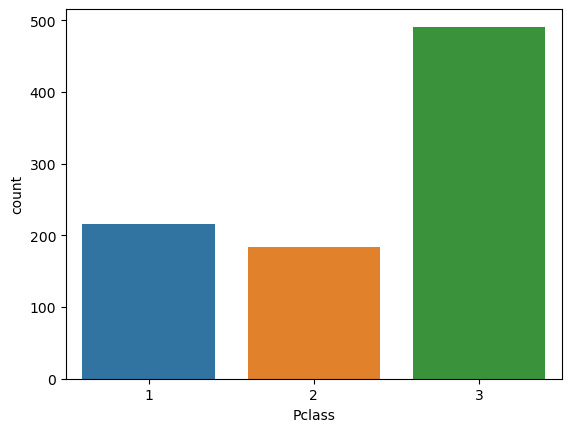

In [241]:
sns.countplot(data = data, x = "Pclass")

<AxesSubplot:ylabel='Pclass'>

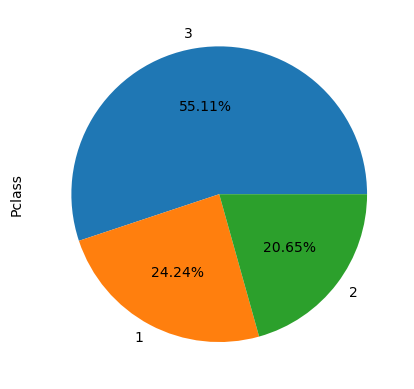

In [242]:
df = data.Pclass.value_counts()
df.plot.pie(autopct='%.2f%%')

In [243]:
titanic_size = data.pivot_table(
    index = "Pclass", columns = "Sex", aggfunc = "size")

titanic_size

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


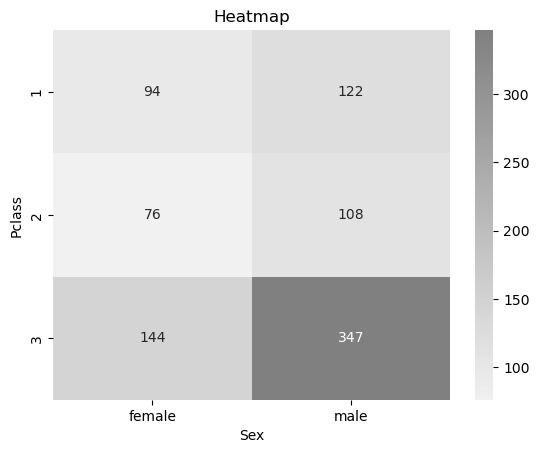

In [244]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap = True), annot = True, fmt = "d")
plt.title("Heatmap")

plt.show()

In [245]:
# 2. 생존자와 사망자 총 숫자 및 차트표시

<AxesSubplot:xlabel='Survived', ylabel='count'>

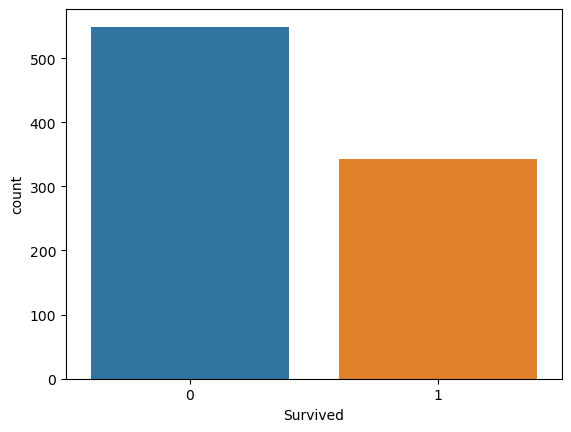

In [246]:
sns.countplot(data = data, x = label)

<AxesSubplot:ylabel='Survived'>

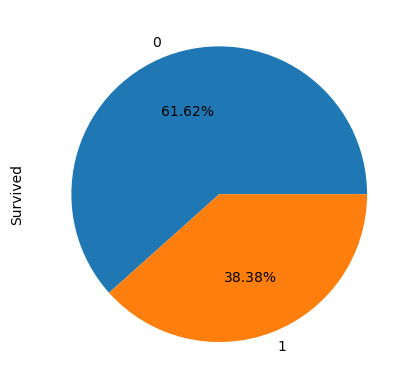

In [247]:
df = features.Survived.value_counts()
df.plot.pie(autopct='%.2f%%')

In [248]:
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석

In [249]:
print(features['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [250]:
print(features['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [251]:
print(features['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [252]:
features.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

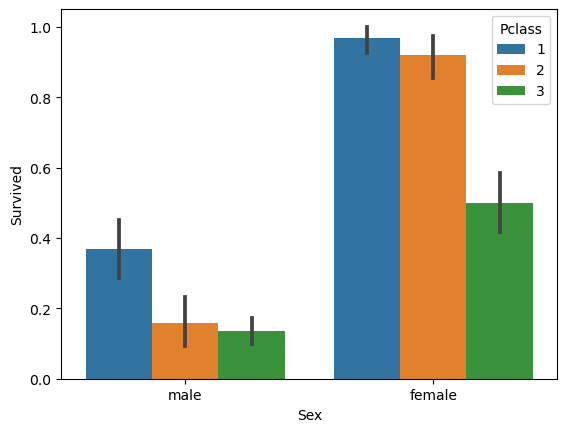

In [253]:
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = features)

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

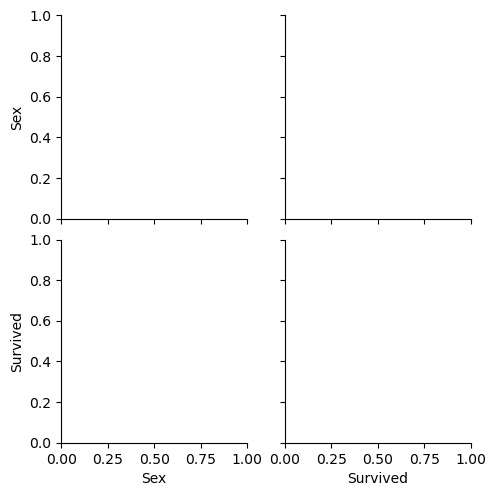

In [254]:
sns.pairplot(vars = ['Sex', 'Pclass'], hue = 'Survived', data = features)

plt.show()

In [ ]:
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행

In [255]:
X_data = data
y_data = label

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, stratify = y_data, test_size = 0.3, random_state = 0)

In [256]:
print("X_train.shape:", X_train.shape)

print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape: (623, 6)
y_train.shape: (623,)
X_test.shape: (268, 6)
y_test.shape: (268,)


In [263]:
# LogisticRegression 학습/예측/평가

LR_clf = LogisticRegression()

LR_clf.fit(X_train, y_train)

LR_pred = LR_clf.predict(X_test)

print(accuracy_score(y_test, LR_pred))

ValueError: could not convert string to float: 'male'

In [264]:
# DecisionTreeClassifier 학습/예측/평가

DT_clf = DecisionTreeClassifier(random_state = 0)

DT_clf.fit(X_train, y_train)

DT_pred = DT_clf.predict(X_test)

print(accuracy_score(y_test, DT_pred))

ValueError: could not convert string to float: 'male'

In [265]:
# RandomForestClassifier 학습/예측/평가

RF_clf = RandomForestClassifier(random_state = 0)

RF_clf.fit(X_train, y_train)

RF_pred = RF_clf.predict(X_test)

print(accuracy_score(y_test, RF_pred))

ValueError: could not convert string to float: 'male'

In [266]:
k = 3

model = KNeighborsClassifier(n_neighbors = k)

model.fit(X_train, y_train)

ValueError: could not convert string to float: 'male'

In [267]:
KNN_pred = model.predict(X_test)

model.score(X_test, y_test)

ValueError: could not convert string to float: 'male'

In [268]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
model.fit(X_train_scaled, y_train)

print(model.score(X_test_scaled, y_test))

ValueError: could not convert string to float: 'male'